<div style = "background-image: url('Images/Fire/pot_fire.png'); height: 400px;vertical-align: middle;">
    <p>
        <h1 style = "color: white; text-align: center; line-height: 100px; font-family: serif;"> <u>Forest Fire Prediction </u> </h1> 
        <h2 style = "color: white; text-align: center; font-family: serif;"> Micigan Technological University </h2> 
        <h2 style = "color: white; text-align: center; font-family: serif;">MA 5751 Fall 2020</h2>
        <h3 style = "color: white; text-align: center; font-family: serif;"> Michael Nicodemus </h3>
    </p>
</div>
<div style = "background-color: white; height: 50px; line-height: 50px;">
<b>Image Source: </b><a href = "https://www.bbc.com/news/in-pictures-40317711"> https://www.bbc.com/news/in-pictures-40317711 </a>
</div>


<div style = "background-color: white; height: 50px; line-height: 45px;">
    <b style = "font-family: Georgia, serif;">Data: </b><a href="https://archive.ics.uci.edu/ml/datasets/forest+fires">https://archive.ics.uci.edu/ml/datasets/forest+fires"</a>
    
</div>

<div style = "background-color: white; height: 50px; line-height: 50px;">
    <b style = "font-family: Georgia, serif;">Github: </b><a href="https://github.com/nicodemusmd/Forest_Fire">https://github.com/nicodemusmd/Forest_Fire</a>
    
</div>

<div style = "background-color: AliceBlue; font-family: 'Times New Roman', Times, serif; width: 500px; border: 3px solid black">
    <b style = "font-family: Georgia, serif;"><u>Summary of Study:</u></b>
    <ol>
        <li>Variable Selection
            <ul>
                <li>EDA</li>
                <li>Variable Selection (Stepwise & Penalized Likelihood)</li>
                <li>Shrinkage Methods</li>
                <li>Model Selection on (AIC/BIC & CV)</li>
            </ul>
        </li>
        <li>Classification (With Bootsrap)
            <ul>
                <li>Logistic Regression</li>
                <li>Naive Bayes</li>
                <li>SVM </li>
                <li>LDA/QDA</li>
            </ul>  
        </li>
        <li>Tree-based Methods
            <ul>
                <li>Random Forests</li>
                <li>Bagging/Boosting</li>
                <li>Ensemble Tree</li>
            </ul>
        </li>
        <li>Unsupervised Learning
            <ul>
                <li>PCA</li>
                <li>K Means</li>
                <li>Spectral !!</li>
            </ul>   
        </li>
        <li>Deep Learning (With Hyperameter Tuning)
            <ul>
                <li>Neural Networks</li>
                <li>GAMs</li>
                <li>MARS (kernal smoothing splines)</li>
            </ul>
        </li>
    </ol> 


</div>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import random as rd
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



# from pyearth import Earth

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Feature Selection
from sklearn.decomposition import PCA

####----------------------####
####--------Models--------####
## NN
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

#Cluster
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import SpectralClustering

####----------------------####

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score as EV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


#Sampling
from sklearn.model_selection import train_test_split as TTS


#Custom Libraries
#from MyLibrary import Neural_Network_report as nnr
#from MyLibrary import RegressionReport as rep
from MyLibrary import predRespPlots as prt
from MyLibrary import fit_linear_reg as flr
from MyLibrary import feature_selection
from MyLibrary import plot_feature_selection_criterion

In [2]:
#Import data
file = "Data/forestfires.csv"
fire = pd.read_csv(file)
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## EDA

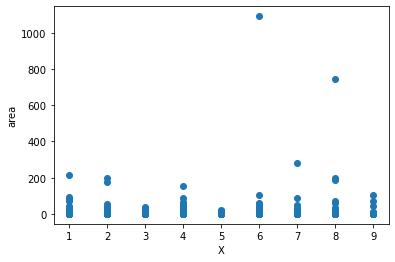

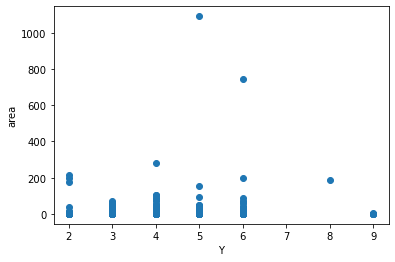

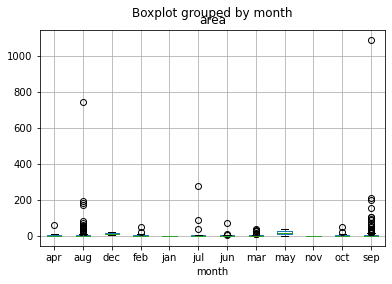

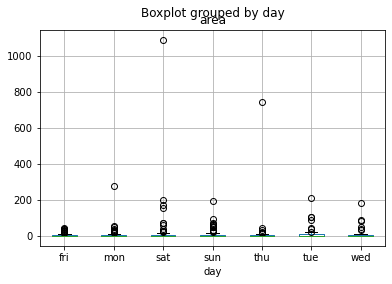

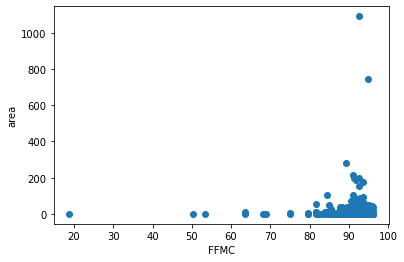

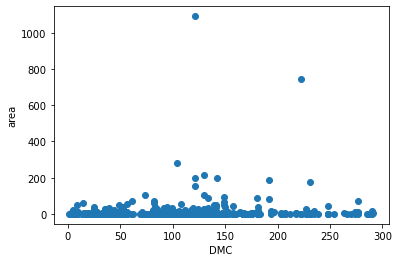

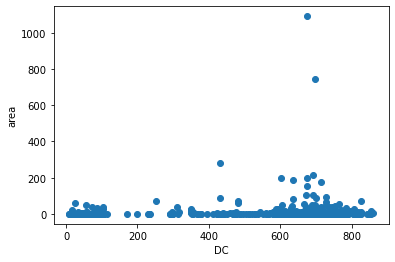

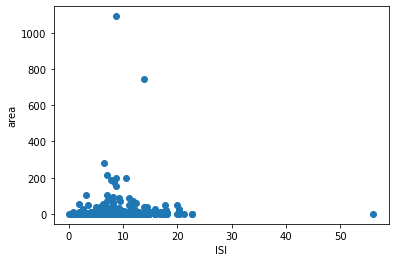

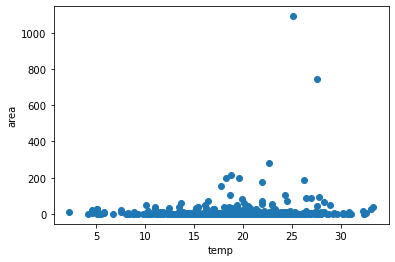

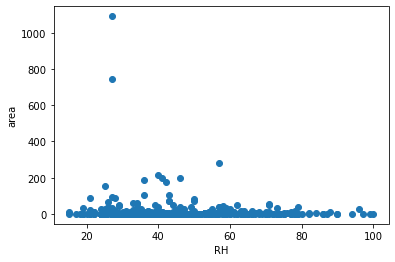

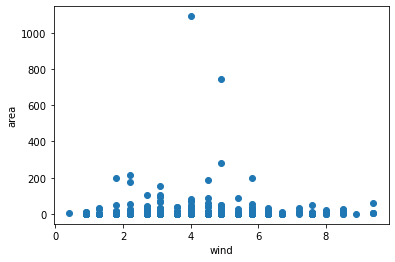

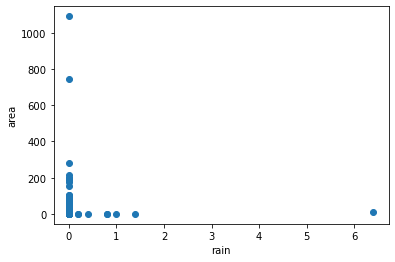

In [3]:
# custom function that will plot all predictors against response. This will save plots to Images/PredRespPlots unless 
# the save argument is removed/set to False.
prt(fire, "area", save = False, path = "Images/predRespPlots")

In [4]:
fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
o = list(set([(x,y) for (x,y) in zip(fire.X, fire.Y)]))

coor_burnt = {(i,j): [0,0] for (i,j) in o} ###[total_area_burnt, num_of_fires]

for k in range(len(fire)):
    i = int(fire['X'][k])
    j = int(fire['Y'][k])
    coor_burnt[(i,j)][0] += fire['area'][k]
    coor_burnt[(i,j)][1] +=1
    

for m in coor_burnt.keys():
    a = round(coor_burnt[m][0],2)
    coor_burnt[m][0] = a


tot_area = []
tot_incidences = []
for coor in coor_burnt.keys():
    tot_area.append(coor_burnt[coor][0])
    tot_incidences.append(coor_burnt[coor][1])
mean_area = round(np.mean(tot_area),2)
mean_incid = round(np.mean(tot_incidences),2)
var_area = round(np.var(tot_area),2)
var_incid = round(np.var(tot_incidences),2)

print(mean_area)
print(mean_incid)
print(var_area)
print(var_incid)

#Total area burnt and number of fire incidences by coordinate
coor_burnt

184.5
14.36
92000.7
223.01


{(3, 4): [126.35, 43],
 (4, 3): [172.88, 22],
 (5, 4): [73.75, 23],
 (4, 6): [87.73, 8],
 (9, 5): [8.16, 2],
 (8, 3): [26.31, 3],
 (8, 6): [1265.3, 52],
 (2, 2): [462.65, 25],
 (2, 5): [92.63, 20],
 (1, 3): [157.14, 10],
 (7, 4): [474.37, 45],
 (6, 5): [1384.05, 49],
 (4, 5): [287.01, 25],
 (3, 3): [6.58, 1],
 (5, 6): [17.62, 4],
 (3, 6): [0.0, 4],
 (8, 5): [2.93, 4],
 (9, 4): [185.61, 4],
 (8, 8): [185.76, 1],
 (2, 4): [143.37, 27],
 (1, 2): [219.94, 19],
 (1, 5): [115.47, 4],
 (6, 4): [144.47, 9],
 (7, 3): [27.35, 2],
 (7, 6): [86.45, 2],
 (3, 5): [2.18, 7],
 (4, 4): [397.43, 36],
 (5, 5): [0.0, 3],
 (8, 4): [12.18, 1],
 (9, 9): [4.47, 6],
 (9, 6): [42.87, 1],
 (1, 4): [150.28, 15],
 (2, 3): [0.0, 1],
 (6, 6): [8.59, 3],
 (7, 5): [77.39, 11],
 (6, 3): [192.78, 25]}

<div style = "background-image: url('Images/Fire/Map.png'); width: 1158px; height: 717px; vertical-align: middle;">

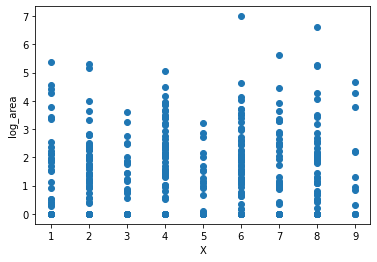

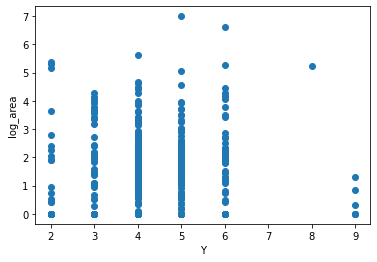

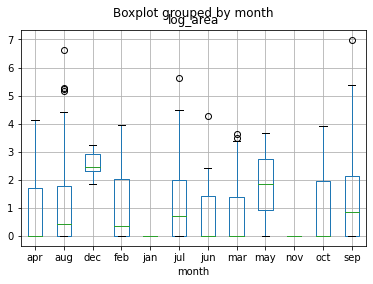

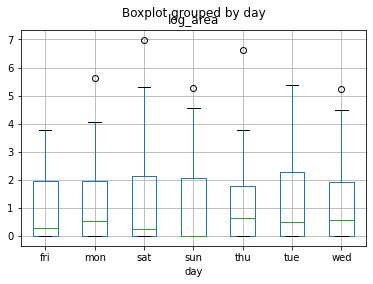

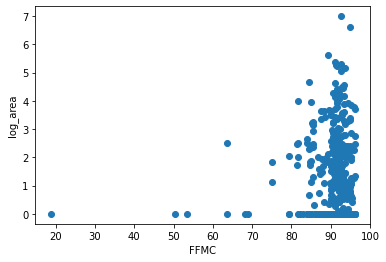

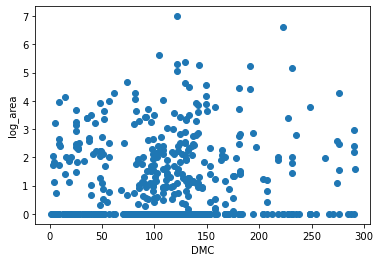

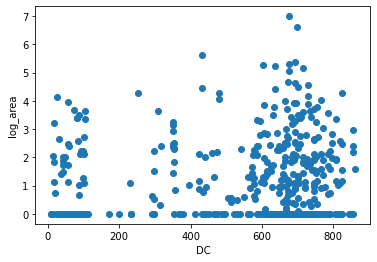

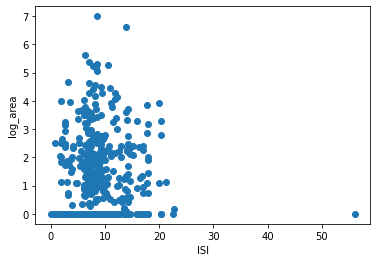

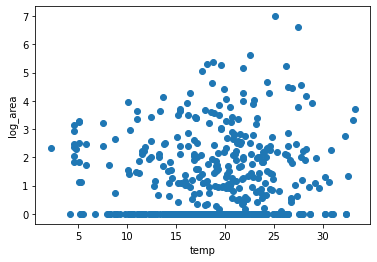

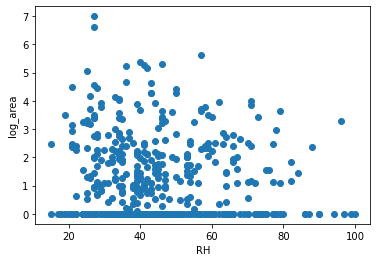

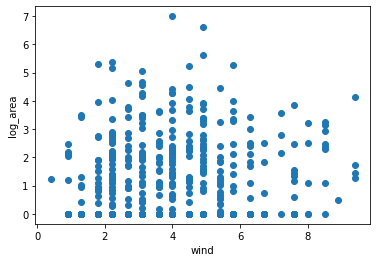

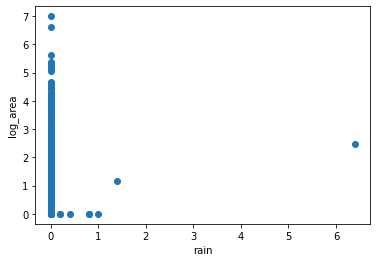

In [6]:
fire["log_area"] = np.log(fire["area"] + 1)
df = fire.drop(columns = "area")
#look at scatter plots after y transformation
prt(df, "log_area")

<AxesSubplot:>

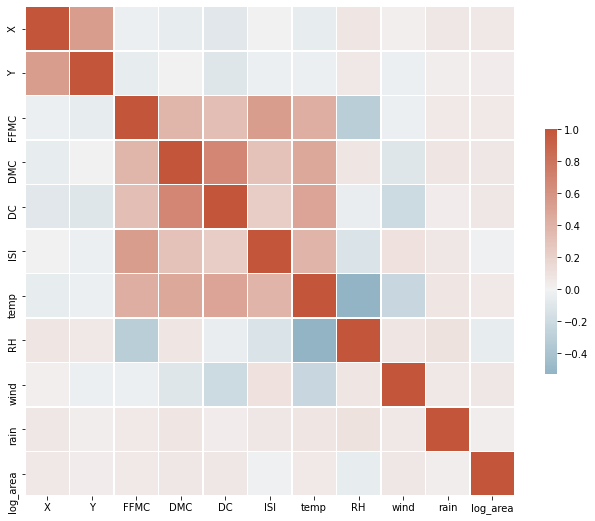

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#fig.savefig("Images/EDA/SNS_Cor_HMAP.png")

In [8]:
#fire.month.unique()
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_val = {mon: round(np.sin(2*months.index(mon)*np.pi/12),2) for mon in months}

def get_val(s):
    return month_val[s]

def is_weekend(d):
    if d in ['fri', 'sat', 'sun']:
        return 1
    else:
        return 0

fire_tr = fire
fire_tr["Month_Cycle_Score"] = fire_tr['month'].apply(get_val)
fire_tr["Weekend"] = fire_tr['day'].apply(is_weekend)

X = fire_tr.drop(columns = ['month', 'day', 'area'])


y = np.log(fire_tr["area"] + 1)

X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area,Month_Cycle_Score,Weekend
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.87,1
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,-1.00,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,-1.00,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.87,1
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.87,1


<AxesSubplot:>

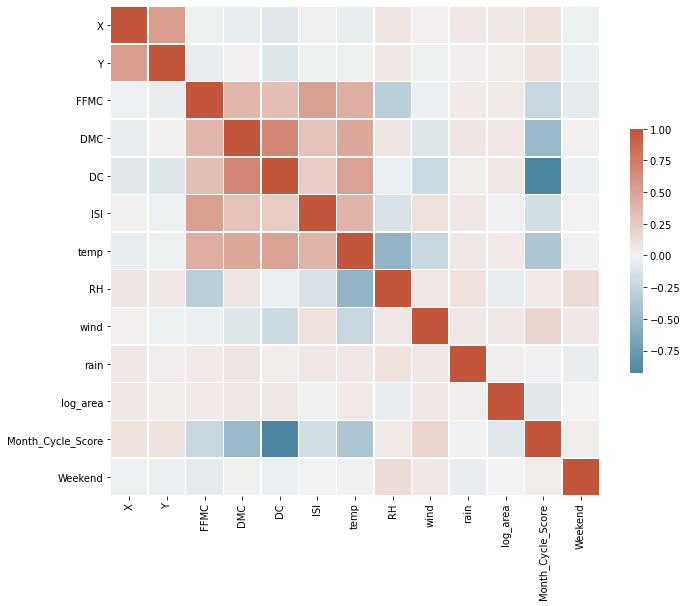

In [9]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#fig.savefig("Images/EDA/SNS_Cor_HMAP_transformed_month.png")

Since my defined month variable did not turn out to be correlated with the area burnt and neither did my weekend variable, I will revert back to the data frame 'df' to perform the variable selection.

For Feature Selection, I am using the fit_linear_reg() function as found <a href = "https://colab.research.google.com/drive/1acRIrPQpa_6IHkIlNkGJzsIlxz-ibY0M?usp=sharing#scrollTo=CV-vud5Cpg_r">here</a>

In [10]:
# Get Dummy variables
df = pd.get_dummies(fire, prefix=['month', 'day'])
data = df.drop(columns = ["area", "log_area"])
data.shape


(517, 31)

In [11]:
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
y_fs = df.log_area
X_fs = data

fs = feature_selection(X_fs, y_fs)

# My fs object returns the DataFrame. 
# The object can then be put directly into the plot_feature_selection_criterion() function along with the 
# predictor DataFrame and the y values.

fs.head()

,features,RSS,R_squared,numb_features
1,[month_dec],989.560016,0.019365,1
2,"[month_dec, temp]",978.383174,0.030441,2
3,"[month_dec, temp, month_sep]",970.223472,0.038527,3
4,"[month_dec, temp, month_sep, X]",964.255692,0.044441,4
5,"[month_dec, temp, month_sep, X, wind]",960.388435,0.048274,5


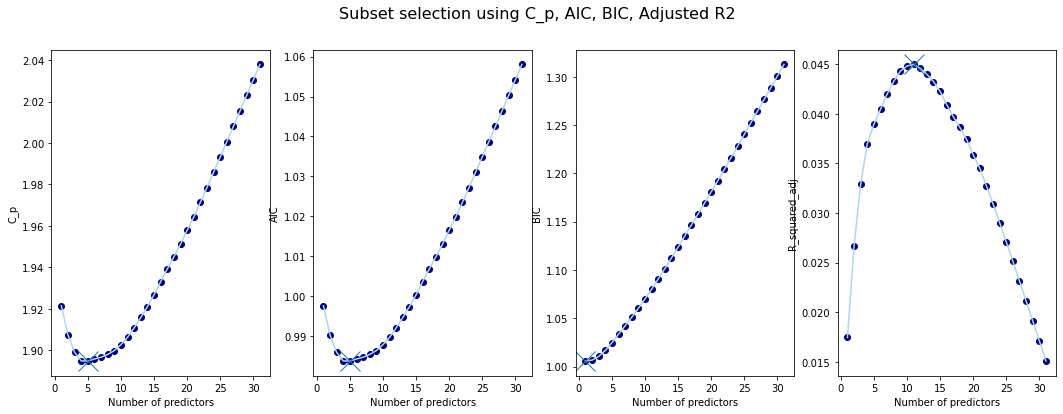

<Figure size 432x288 with 0 Axes>

In [14]:
plot_feature_selection_criterion(fs, X_fs, y_fs)
#plt.savefig("Images/EDA/feature_selection.png")

In [39]:
# Calculate Mallow's Cp, AIC, BIC, and adjusted R2.
m = len(y_vs)
p = k
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))

df1.head()

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[month_dec],989.560016,0.019365,1,1.921463,1.001698,1.009915,0.017461
2,"[month_dec, temp]",978.383174,0.030441,2,1.907265,0.994297,1.010730,0.026669
3,"[month_dec, temp, month_sep]",970.223472,0.038527,3,1.898903,0.989937,1.014587,0.032905
4,"[month_dec, temp, month_sep, X]",964.255692,0.044441,4,1.894780,0.987788,1.020655,0.036976
5,"[month_dec, temp, month_sep, X, wind]",960.388435,0.048274,5,1.894720,0.987757,1.028841,0.038961


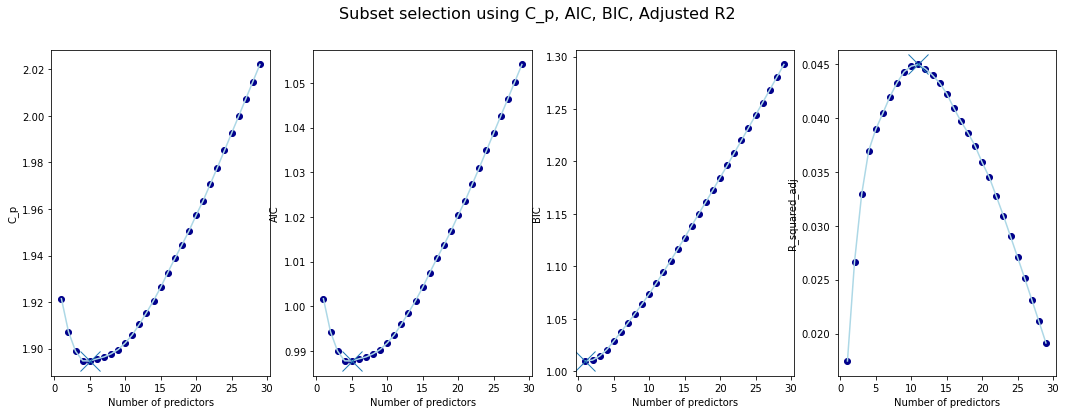

In [41]:
# plot model selection criteria against the model complexity.
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [48]:
model_c = df1[df1["C_p"] == df1["C_p"].min()]["features"] 
model_c

5    [month_dec, temp, month_sep, X, wind]
Name: features, dtype: object

In [67]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']

for v in (variables):
    if v == "R_squared_adj":
        model = df1[df1[v] == df1[v].min()]["features"] 
    else:  
        model = df1[df1[v] == df1[v].min()]["features"] 
    print(f"Criteria: {v} Model Predictors: {list(model)[0]}\n")

Criteria: C_p Model Predictors: ['month_dec', 'temp', 'month_sep', 'X', 'wind']

Criteria: AIC Model Predictors: ['month_dec', 'temp', 'month_sep', 'X', 'wind']

Criteria: BIC Model Predictors: ['month_dec']

Criteria: R_squared_adj Model Predictors: ['month_dec']



<Figure size 1296x432 with 0 Axes>

['month_dec']

In [126]:
#fire.month.unique()
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_val = {mon: round(np.sin(2*months.index(mon)*np.pi/12),2) for mon in months}

def get_val(s):
    return month_val[s]

def is_weekend(d):
    if d in ['fri', 'sat', 'sun']:
        return 1
    else:
        return 0
    
fire["Month_Cycle_Score"] = fire['month'].apply(get_val)
fire["Weekend"] = fire['day'].apply(is_weekend)

X = fire.drop(columns = ['month', 'day', 'area'])


y = np.log(fire["area"] + 1)

X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Month_Cycle_Score,Weekend
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.87,1
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,-1.00,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,-1.00,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.87,1
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.87,1


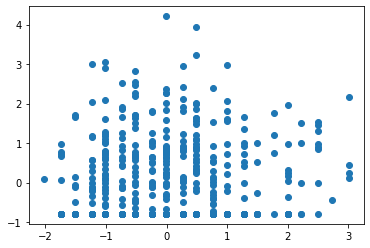

In [145]:
plt.figure()
wind_sc = (X.wind - np.mean(X.wind))/np.std(X.wind)
plt.scatter(wind_sc, y_sc)

In [142]:
n = (X.wind - np.mean(X.wind))/np.std(X.wind)


In [34]:
#Split the Data
X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.2, random_state = 5)

In [35]:
#Scale data
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [135]:
#plt.figure()
#plt.scatter(X_testscaled.wind, y)



(12, 413)



---------------------------------------
---------------------------------------
Model: relu 
Layers: 7 
Size: (25, 25, 25, 25, 25)
Mean Response: 1
MSE: 2.43
Relative MSE: 219.82% of mean response.
R^2 Score: -0.41
Explained Variace: -0.4
Mean Absolute Error: 1.17
---------------------------------------
---------------------------------------




---------------------------------------
---------------------------------------
Model: logistic 
Layers: 7 
Size: (25, 25, 25, 25, 25)
Mean Response: 1
MSE: 1.73
Relative MSE: 156.22% of mean response.
R^2 Score: -0.0
Explained Variace: -0.0
Mean Absolute Error: 1.03
---------------------------------------
---------------------------------------




---------------------------------------
---------------------------------------
Model: tanh 
Layers: 7 
Size: (25, 25, 25, 25, 25)
Mean Response: 1
MSE: 1.68
Relative MSE: 151.79% of mean response.
R^2 Score: 0.03
Explained Variace: 0.03
Mean Absolute Error: 1.01
---------------------------------

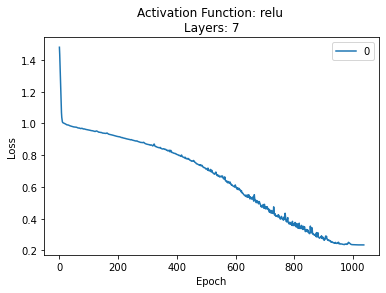

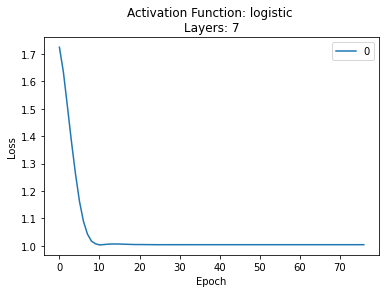

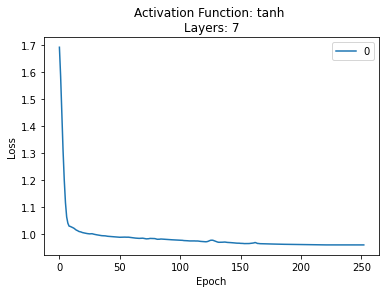

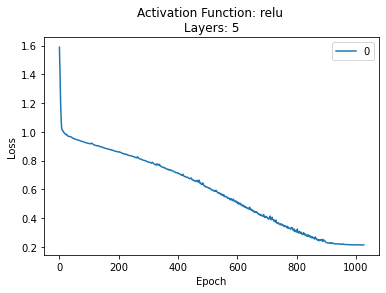

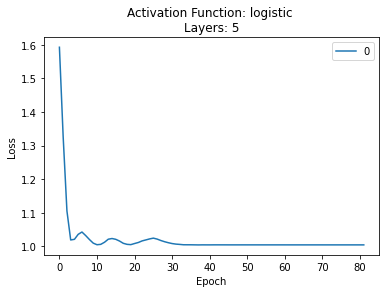

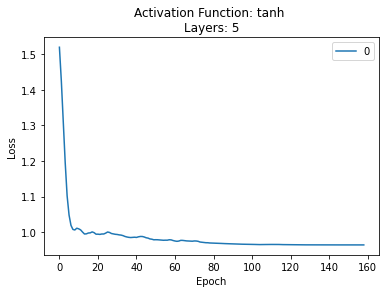

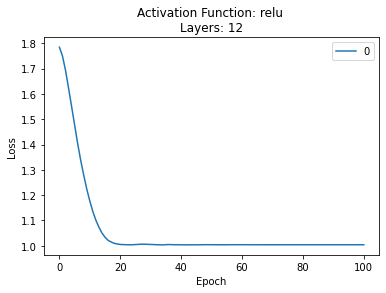

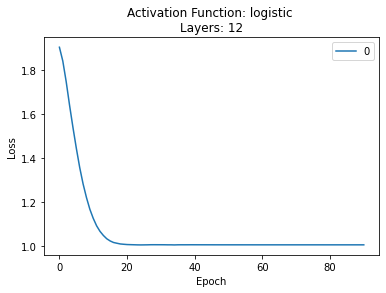

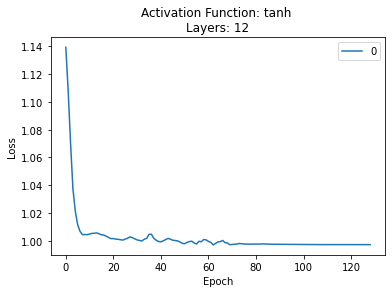

In [51]:
sizes = [(25,25,25,25,25), (100,100,100), (10,10,10,10,10,10,10,10,10,10)]

#sizes = [tuple(12 for i in range(100)), tuple(12 for i in range(20))]
for s in sizes:
    r1 = MLPRegressor(hidden_layer_sizes=s,activation="relu" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_r = r1.fit(X_trainscaled, y_train)
    
    r2 = MLPRegressor(hidden_layer_sizes=s,activation="logistic" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_s = r2.fit(X_trainscaled, y_train)
    
    r3 = MLPRegressor(hidden_layer_sizes=s,activation="tanh" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_t = r3.fit(X_trainscaled, y_train)
    
    
    reg = [reg_r, reg_s, reg_t]
    #print(r1.score)
    for r in reg:
        rep(r, X_testscaled, y_test, s)


In [31]:
from pyearth import Earth

ModuleNotFoundError: No module named 'pyearth'

In [9]:
#MARS Models
model = Earth()
model.fit(X_trainscaled,y_train)
print(model.trace())
print(model.summary())

NameError: name 'Earth' is not defined

In [33]:
len(r.loss_curve_)

len(y_test)

104



---------------------------------------
---------------------------------------
Model: tanh 
Layers: 102 
Size: (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)
Mean Response: 1
MSE: 1.73
Relative MSE: 156.89% of mean response.
R^2 Score: -0.0
Explained Variace: -0.0
Mean Absolute Error: 1.01
---------------------------------------
---------------------------------------




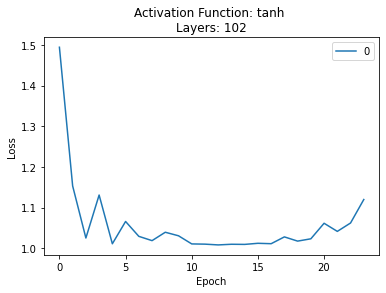

In [73]:
s = tuple(100 for i in range(100))
r2 = MLPRegressor(hidden_layer_sizes = s, activation = "tanh", max_iter=2000).fit(X_trainscaled, y_train)

rep(r2, X_testscaled, y_test, s)

In [179]:
#dir(r2)
#r2.activation

In [72]:
y_pred2=r2.predict(X_testscaled)
np.min(y_pred2)

1.6230199645019563

In [84]:
r2.n_features_in_

12

In [90]:
len(y_test)

104